In [12]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import ml library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Problem statement: 

We are trying to predict the species of a flower using it's features

In [3]:
# import data
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


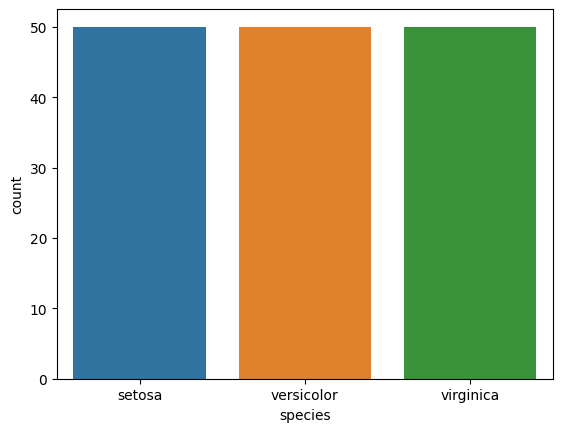

In [4]:
# create a countplot to check the unique species in the data
sns.countplot(data=iris_data, x='species');

## Why do we split the data into features and labels?

-- we split the data into features and labels because we want the model to learn trends that are in the features and after that try and predict the targets

In [5]:
# Machine Learning

# create your features and target
X = iris_data.drop('species', axis=1) # features
y = iris_data['species'] # target

# instantiate the model
dt = DecisionTreeClassifier()

# fit the model to our data
dt.fit(X, y)

# make predictions
y_pred = dt.predict(X)

In [6]:
# create a new dataframe with the actual and predicted values
iris_new_data = X.copy()
iris_new_data['species'] = y
iris_new_data['Predicted Species'] = y_pred
iris_new_data.sample(20)

,sepal_length,sepal_width,petal_length,petal_width,species,Predicted Species
91,6.1,3.0,4.6,1.4,versicolor,versicolor
147,6.5,3.0,5.2,2.0,virginica,virginica
135,7.7,3.0,6.1,2.3,virginica,virginica
142,5.8,2.7,5.1,1.9,virginica,virginica
0,5.1,3.5,1.4,0.2,setosa,setosa
129,7.2,3.0,5.8,1.6,virginica,virginica
111,6.4,2.7,5.3,1.9,virginica,virginica
43,5.0,3.5,1.6,0.6,setosa,setosa
9,4.9,3.1,1.5,0.1,setosa,setosa
123,6.3,2.7,4.9,1.8,virginica,virginica


In [7]:
dict = {'sepal_length': [4.5],
'sepal_width': [3.0],
'petal_length': [1],
'petal_width': [0.5]
}

In [8]:
# create a sample data to test the model
sample_data = pd.DataFrame(dict)

# make a prediction using the sample data
prediction = dt.predict(sample_data)
prediction

array(['setosa'], dtype=object)

In [9]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

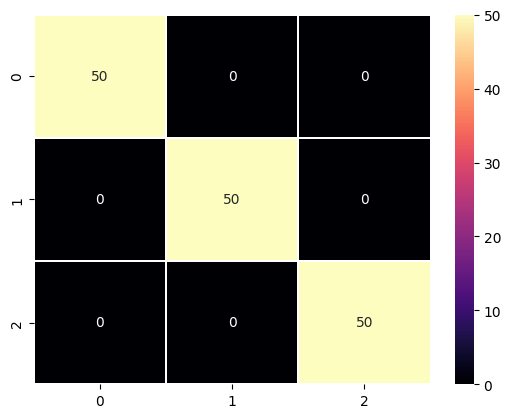

In [10]:
sns.heatmap(confusion_matrix(y, y_pred), 
            annot=True, 
            cmap='magma', 
            lw=0.2, 
            linecolor='white');

In [11]:
# classification report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      1.00      1.00        50
   virginica       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



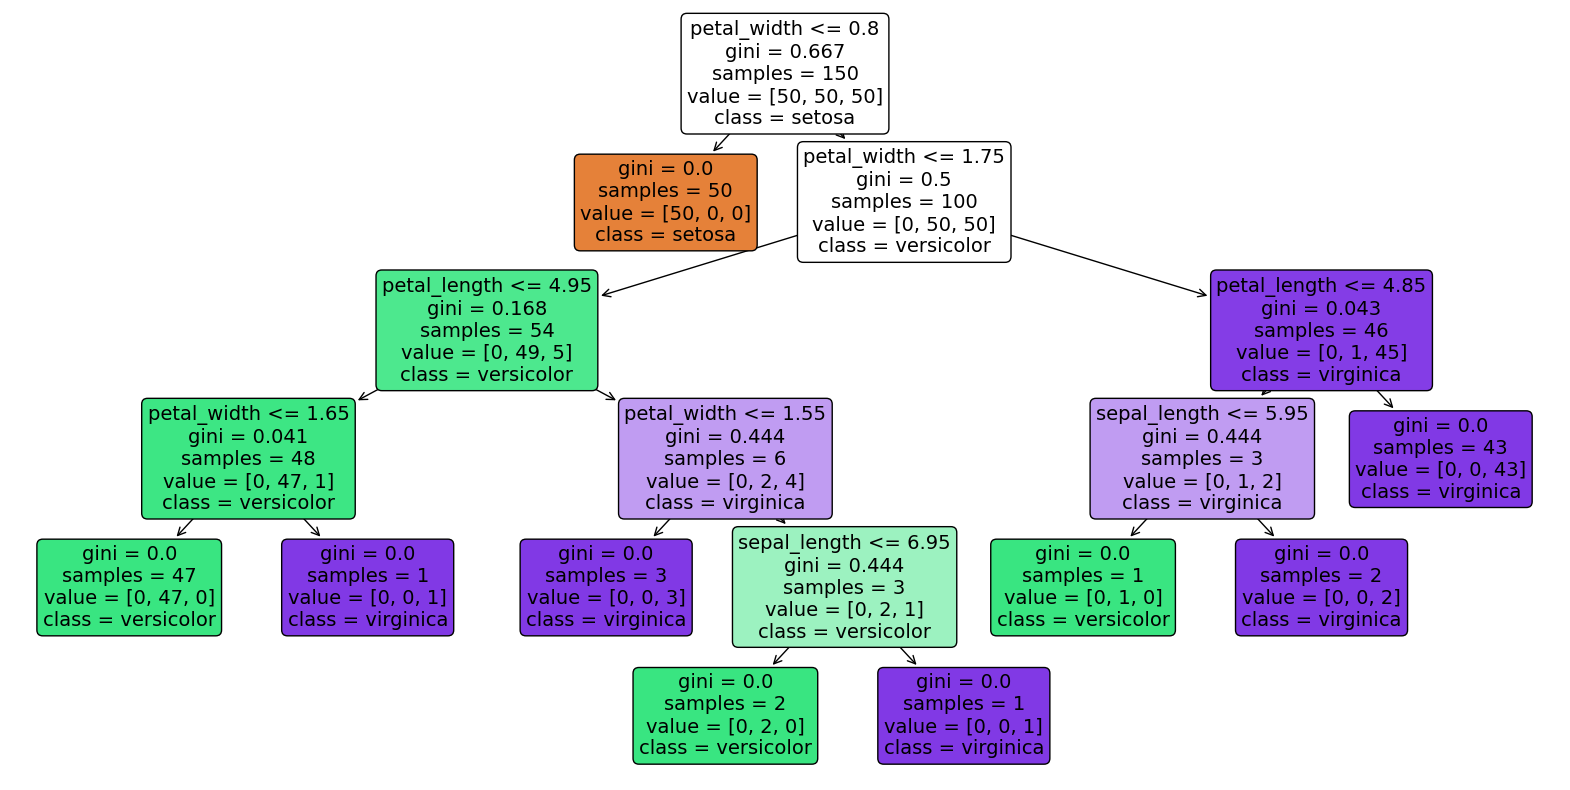

In [13]:
## Visualize Decision Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt, 
          feature_names=X.columns, 
          class_names=y.unique(), 
          filled=True, 
          rounded=True, 
          fontsize=14);

### Instructions for random forest

- Using the same steps as the decision tree, train a random forest model on the iris dataset and predict the species of the flower using the features.
- compare the scores of the decision tree and the random forest model
- email final results to my email: joseph@africdsa.tech